In [1]:
%%time
dataset_name = "W19_comb"
df_list = 'BES_reduced_with_na|BES_Panel'
%matplotlib inline
%run BES_header.py {dataset_name} {df_list}
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)
pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')

Toggle code

var_type (8079, 14)
Wall time: 51.4 s


In [2]:
treatment_dict = {}
BES_reduced_with_na[["Economic Left-Right","Social Liberal-Authoritarian"]] = pan_dataset_allr_values[['Economic: Left <-> Right{gaussian-ish}complete_fully','Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully']]
BES_reduced_with_na["Age"] = pan_dataset_ages["Age_at_W10"]

In [4]:
search(BES_reduced_with_na,"polAttention")
Treatment = "polAttentionW19"
var_stub = "polAttention"

var_list = ["polAttentionW19__Pay a great deal of attention"]
var_stub_list = [var_stub]


[20:42:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:6.40044
Will train until validation_0-rmse hasn't improved in 50.800000000000004 rounds.
[1]	validation_0-rmse:6.10932
[2]	validation_0-rmse:5.83295
[3]	validation_0-rmse:5.57296
[4]	validation_0-rmse:5.32548
[5]	validation_0-rmse:5.09048
[6]	validation_0-rmse:4.86842
[7]	validation_0-rmse:4.65843
[8]	validation_0-rmse:4.46011
[9]	validation_0-rmse:4.27012
[10]	validation_0-rmse:4.09123
[11]	validation_0-rmse:3.92315
[12]	validation_0-rmse:3.76286
[13]	validation_0-rmse:3.61163
[14]	validation_0-rmse:3.46802
[15]	validation_0-rmse:3.33426
[16]	validation_0-rmse:3.20705
[17]	validation_0-rmse:3.08819
[18]	validation_0-rmse:2.97599
[19]	validation_0-rmse:2.86943
[20]	validation_0-rmse:2.7698
[21]	validation_0-rmse:2.67534
[22]	validation_0-rmse:2.58628
[23]	validation_0-rmse:2.50316
[24]	validation_0-rmse:2.42544
[25]	validation_0-rmse:2.35222
[26]	val

[254]	validation_0-rmse:1.34938
[255]	validation_0-rmse:1.34934
[256]	validation_0-rmse:1.34934
[257]	validation_0-rmse:1.34936
[258]	validation_0-rmse:1.34936
[259]	validation_0-rmse:1.34937
[260]	validation_0-rmse:1.34934
[261]	validation_0-rmse:1.34939
[262]	validation_0-rmse:1.34939
[263]	validation_0-rmse:1.34936
[264]	validation_0-rmse:1.3492
[265]	validation_0-rmse:1.34914
[266]	validation_0-rmse:1.34924
[267]	validation_0-rmse:1.34905
[268]	validation_0-rmse:1.34885
[269]	validation_0-rmse:1.34871
[270]	validation_0-rmse:1.34841
[271]	validation_0-rmse:1.34845
[272]	validation_0-rmse:1.34837
[273]	validation_0-rmse:1.34819
[274]	validation_0-rmse:1.34806
[275]	validation_0-rmse:1.34818
[276]	validation_0-rmse:1.34811
[277]	validation_0-rmse:1.34818
[278]	validation_0-rmse:1.34814
[279]	validation_0-rmse:1.34817
[280]	validation_0-rmse:1.34814
[281]	validation_0-rmse:1.34806
[282]	validation_0-rmse:1.34799
[283]	validation_0-rmse:1.3479
[284]	validation_0-rmse:1.34789
[285]	vali

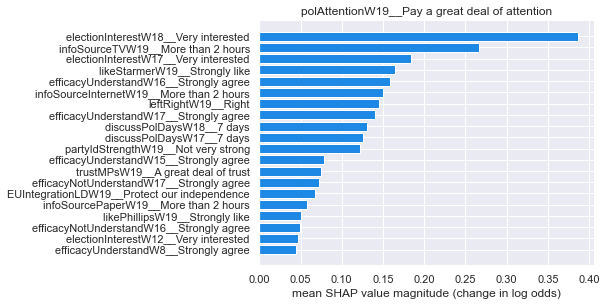

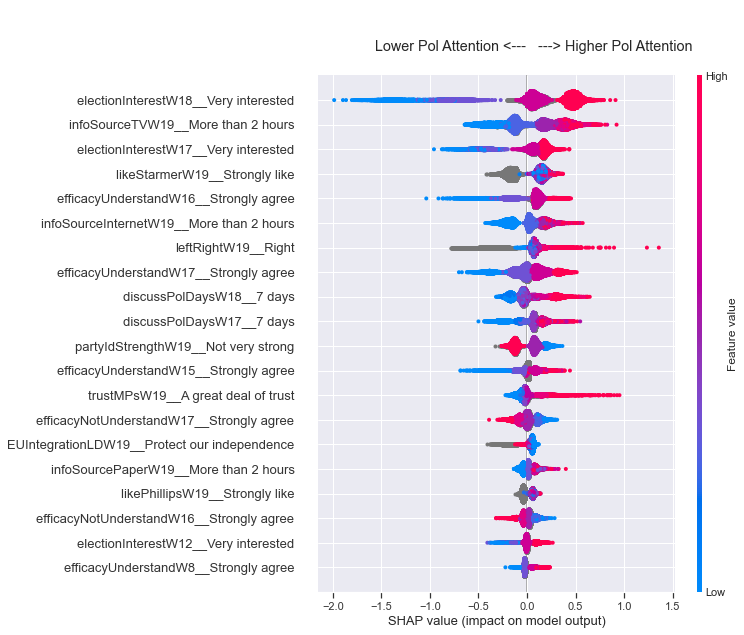

Wall time: 1h 27min 26s


(<shap.explainers.tree.TreeExplainer at 0x60bf39c8>,
 array([[ 5.0857143e-06,  1.3086255e-04, -7.5929689e-05, ...,
         -2.6812328e-02,  5.9045972e-03, -2.6612075e-02],
        [ 5.0857143e-06, -1.9900082e-04, -4.2513417e-05, ...,
          8.9793736e-03,  4.7952360e-03, -2.1919042e-02],
        [ 1.4878262e-05, -2.8411094e-05, -1.8709523e-05, ...,
          8.4405178e-03,  2.4817914e-03, -3.0875467e-02],
        ...,
        [-4.9859004e-06,  1.8868424e-04, -2.5780702e-05, ...,
          1.4066377e-04, -1.0202696e-03, -2.6080228e-02],
        [-6.1675230e-05,  1.8868424e-04, -2.5861838e-05, ...,
          2.2056310e-03, -5.9182881e-03,  1.1670844e-02],
        [-4.9859004e-06,  1.8868424e-04, -4.2513417e-05, ...,
          1.1545651e-02, -7.3721685e-04,  5.0405846e-03]], dtype=float32),
 Index(['turnoutUKGeneralW1__Very likely that I will vote',
        'turnoutUKGeneralW2__Very likely that I will vote',
        'turnoutUKGeneralW3__Very likely that I will vote',
        'turnoutU

In [7]:
%%time
colname = "polAttentionW19"
xgboost_run(subdir=colname,dataset=BES_reduced_with_na,
            var_list=var_list,var_stub_list=var_stub_list,use_mean_weights=True,
            min_features = min(BES_reduced_with_na.shape[1]-1,20),
            title = "\n\nLower Pol Attention <---   ---> Higher Pol Attention")

In [7]:
def xgboost_run(title, dataset, var_list,var_stub_list=[], subdir=None, min_features=30, dependence_plots=False , output_folder=".."+os.sep+"Output"+os.sep,Treatment="default",
                use_specific_weights = None, automatic_weights_from_wave_no = False):
    # global BES_Panel
    # for target_var,base_var in zip(var_list,base_list):
    treatment_subfolder = create_subdir(output_folder,Treatment)

    for target_var in var_list:
        if automatic_weights_from_wave_no:
            wave_no = get_wave_no( target_var )
            weight_var = num_to_weight[wave_no]    
            print( target_var, wave_no )

        target = create_target(dataset,target_var)
        mask   = target.notnull()
        if optional_mask & automatic_weights_from_wave_no:
            mask = mask&optional_mask_fn(wave_no)
        else:
            mask = mask&optional_mask_fn()
        target = target[mask]

        if sum(mask) < minimum_sample:
            print("Skipping - sample size beneath minimum: ",minimum_sample)
            continue

        train = create_train(dataset,drop_other_waves,var_stub_list,mask)

        if subdir is None:
            output_subfolder = create_subdir(treatment_subfolder,target_var)
        else:
            output_subfolder = create_subdir(treatment_subfolder,subdir)

        if use_specific_weights is not None:
            sample_weights = use_specific_weights[mask].fillna(use_specific_weights[mask].median())




        elif automatic_weights_from_wave_no:
            sample_weights = weights[weight_var][mask]
            print("missing vals in sample weights: "+ str( sample_weights.isnull().sum() ) )
            sample_weights = sample_weights.fillna(sample_weights.median())
        
        else:
            sample_weights = None
    #         get_non_overfit_settings( train, target, alg, seed, early_stoppping_fraction, test_size, sample_weights )
    #         # fit to full dataset at non-overfitting level
    #         alg.fit(train, target, verbose = True, sample_weight = sample_weights)        
    #     else:

        get_non_overfit_settings( train, target, alg, seed, early_stoppping_fraction, test_size, eval_metric, verbose = True,
                                  sample_weights=sample_weights )
        # fit to full dataset at non-overfitting level
        alg.fit(train, target, verbose = True, sample_weight = sample_weights)


    #################

        explainer = shap.TreeExplainer(alg)
        shap_values = explainer.shap_values(train)
        
#         shap_values = shap.TreeExplainer(alg).shap_values(train);

        shap_problem = np.isnan(np.abs(shap_values).mean(0)).any()
        if shap_problem:
            print("hit problem!")
            shap_values = shap.TreeExplainer(alg).shap_values(train, approximate=True);

        shap_outputs(shap_values, train, target_var, output_subfolder, threshold = .1,
                     min_features = min_features, title=title,
                     dependence_plots=dependence_plots)
        
    return (explainer, shap_values, train.columns, alg)

[10:25:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:6.40317
Will train until validation_0-rmse hasn't improved in 50.800000000000004 rounds.
[1]	validation_0-rmse:6.11885
[2]	validation_0-rmse:5.84688
[3]	validation_0-rmse:5.58793
[4]	validation_0-rmse:5.34448
[5]	validation_0-rmse:5.11433
[6]	validation_0-rmse:4.89582
[7]	validation_0-rmse:4.68805
[8]	validation_0-rmse:4.49137
[9]	validation_0-rmse:4.3072
[10]	validation_0-rmse:4.13149
[11]	validation_0-rmse:3.96607
[12]	validation_0-rmse:3.8108
[13]	validation_0-rmse:3.66281
[14]	validation_0-rmse:3.52392
[15]	validation_0-rmse:3.39203
[16]	validation_0-rmse:3.26683
[17]	validation_0-rmse:3.15022
[18]	validation_0-rmse:3.04033
[19]	validation_0-rmse:2.93698
[20]	validation_0-rmse:2.83989
[21]	validation_0-rmse:2.74701
[22]	validation_0-rmse:2.6604
[23]	validation_0-rmse:2.5804
[24]	validation_0-rmse:2.50452
[25]	validation_0-rmse:2.43376
[26]	valida

[255]	validation_0-rmse:1.45028
[256]	validation_0-rmse:1.45
[257]	validation_0-rmse:1.44999
[258]	validation_0-rmse:1.44993
[259]	validation_0-rmse:1.44987
[260]	validation_0-rmse:1.44989
[261]	validation_0-rmse:1.45
[262]	validation_0-rmse:1.44984
[263]	validation_0-rmse:1.44987
[264]	validation_0-rmse:1.44975
[265]	validation_0-rmse:1.44956
[266]	validation_0-rmse:1.44953
[267]	validation_0-rmse:1.44937
[268]	validation_0-rmse:1.44923
[269]	validation_0-rmse:1.44915
[270]	validation_0-rmse:1.44915
[271]	validation_0-rmse:1.44919
[272]	validation_0-rmse:1.44914
[273]	validation_0-rmse:1.44898
[274]	validation_0-rmse:1.44893
[275]	validation_0-rmse:1.44895
[276]	validation_0-rmse:1.44897
[277]	validation_0-rmse:1.44897
[278]	validation_0-rmse:1.44887
[279]	validation_0-rmse:1.4489
[280]	validation_0-rmse:1.44885
[281]	validation_0-rmse:1.44866
[282]	validation_0-rmse:1.44868
[283]	validation_0-rmse:1.44877
[284]	validation_0-rmse:1.44856
[285]	validation_0-rmse:1.44847
[286]	validatio

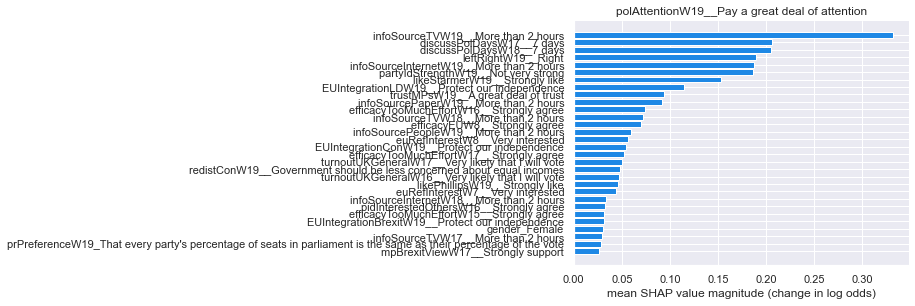

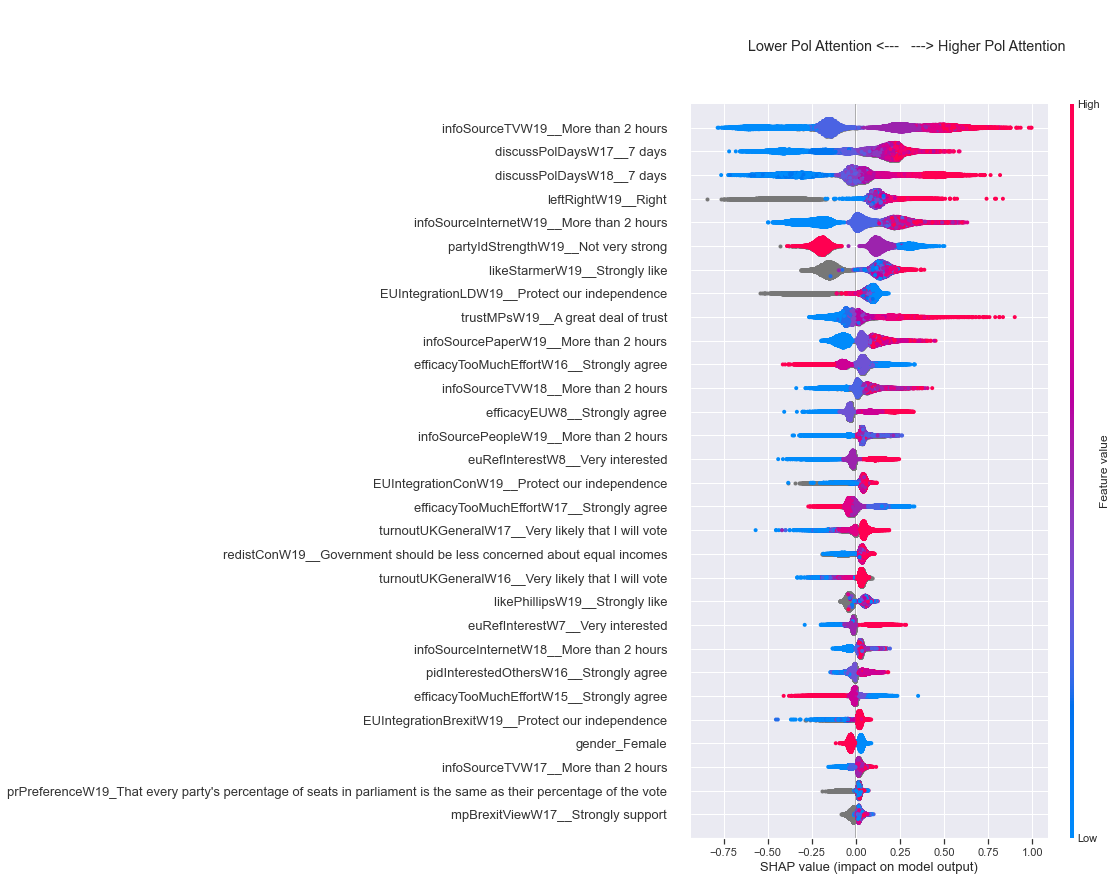

Wall time: 1h 30min 54s


(<shap.explainers.tree.TreeExplainer at 0x609c2c08>,
 array([[ 0.0000000e+00, -1.5032913e-04,  0.0000000e+00, ...,
         -2.6384497e-02, -2.1610449e-03, -1.4753813e-02],
        [ 0.0000000e+00, -7.5635122e-05,  0.0000000e+00, ...,
          1.3664855e-02, -2.0679555e-04, -5.0632134e-03],
        [ 0.0000000e+00, -2.0143212e-04,  0.0000000e+00, ...,
          2.1300413e-02, -3.6906796e-03, -1.5603228e-02],
        ...,
        [ 0.0000000e+00, -5.0790470e-05,  0.0000000e+00, ...,
         -9.2378510e-03, -3.6522842e-03, -1.8954888e-02],
        [ 0.0000000e+00, -9.0350026e-05,  0.0000000e+00, ...,
         -5.5694729e-03,  9.8658558e-03, -2.5889212e-03],
        [ 0.0000000e+00, -9.0350026e-05,  0.0000000e+00, ...,
          1.5648082e-02, -1.6697830e-02,  1.3611382e-02]], dtype=float32),
 Index(['turnoutUKGeneralW1__Very likely that I will vote',
        'turnoutUKGeneralW2__Very likely that I will vote',
        'turnoutUKGeneralW3__Very likely that I will vote',
        'turnoutU

In [3]:
%%time
# search(BES_reduced_with_na,"polAttention")
Treatment = "polAttentionW19_minus_close_correlates"
var_stub = "polAttention"

var_list = ["polAttentionW19__Pay a great deal of attention"]
var_stub_list = [var_stub,"electionInterest","efficacyUnderstand","efficacyNotUnderstand"]

mask = BES_reduced_with_na["polAttentionW19__Pay a great deal of attention"].notnull() & BES_Panel["wt_new_W19_result"].notnull()
colname = "polAttentionW19"
xgboost_run(subdir=colname,dataset=BES_reduced_with_na[mask],
            var_list=var_list,var_stub_list=var_stub_list,use_specific_weights=BES_Panel["wt_new_W19_result"][mask],
            min_features = min(BES_reduced_with_na.shape[1]-1,30),
            title = "\n\nLower Pol Attention <---   ---> Higher Pol Attention")

In [5]:
search(BES_reduced_with_na,"ptvLD")

ptvLDW1__Very likely        14460
ptvLDW2__Very likely        14625
ptvLDW3__Very likely        13239
ptvLDW4__Very likely        15050
ptvLDW5__Very likely        14863
ptvLDW6__Very likely        14701
ptvLDW7__Very likely        27952
ptvLDW8__Very likely         8307
ptvLDW9__Very likely        27814
ptvLDW10__Very likely       26613
ptvLDW11__Very likely       28218
ptvLDW12__Very likely        7928
ptvLDW13__Very likely       28879
ptvLDExpW14__Very likely     6644
ptvLDW15__Very likely       27555
ptvLDW16__Very likely       16715
ptvLDW17__Very likely       30527
ptvLDW18__Very likely        8720
dtype: int64

[09:38:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4.3662
Will train until validation_0-rmse hasn't improved in 50.800000000000004 rounds.
[1]	validation_0-rmse:4.19392
[2]	validation_0-rmse:4.02717
[3]	validation_0-rmse:3.87166
[4]	validation_0-rmse:3.72783
[5]	validation_0-rmse:3.58514
[6]	validation_0-rmse:3.45517
[7]	validation_0-rmse:3.33049
[8]	validation_0-rmse:3.21368
[9]	validation_0-rmse:3.10729
[10]	validation_0-rmse:3.00597
[11]	validation_0-rmse:2.91442
[12]	validation_0-rmse:2.82818
[13]	validation_0-rmse:2.7439
[14]	validation_0-rmse:2.66632
[15]	validation_0-rmse:2.59289
[16]	validation_0-rmse:2.52369
[17]	validation_0-rmse:2.45822
[18]	validation_0-rmse:2.39725
[19]	validation_0-rmse:2.33974
[20]	validation_0-rmse:2.28688
[21]	validation_0-rmse:2.23574
[22]	validation_0-rmse:2.18981
[23]	validation_0-rmse:2.1467
[24]	validation_0-rmse:2.10687
[25]	validation_0-rmse:2.07092
[26]	valid

[254]	validation_0-rmse:1.54282
[255]	validation_0-rmse:1.54279
[256]	validation_0-rmse:1.54275
[257]	validation_0-rmse:1.54283
[258]	validation_0-rmse:1.54274
[259]	validation_0-rmse:1.54273
[260]	validation_0-rmse:1.54259
[261]	validation_0-rmse:1.54254
[262]	validation_0-rmse:1.54256
[263]	validation_0-rmse:1.54224
[264]	validation_0-rmse:1.54205
[265]	validation_0-rmse:1.54196
[266]	validation_0-rmse:1.54184
[267]	validation_0-rmse:1.54174
[268]	validation_0-rmse:1.54163
[269]	validation_0-rmse:1.54158
[270]	validation_0-rmse:1.54114
[271]	validation_0-rmse:1.54109
[272]	validation_0-rmse:1.54105
[273]	validation_0-rmse:1.54106
[274]	validation_0-rmse:1.54087
[275]	validation_0-rmse:1.54077
[276]	validation_0-rmse:1.54096
[277]	validation_0-rmse:1.54093
[278]	validation_0-rmse:1.54107
[279]	validation_0-rmse:1.5411
[280]	validation_0-rmse:1.54107
[281]	validation_0-rmse:1.54106
[282]	validation_0-rmse:1.5411
[283]	validation_0-rmse:1.541
[284]	validation_0-rmse:1.541
[285]	validati

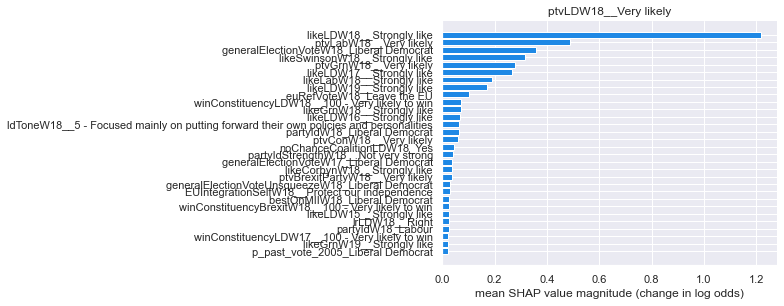

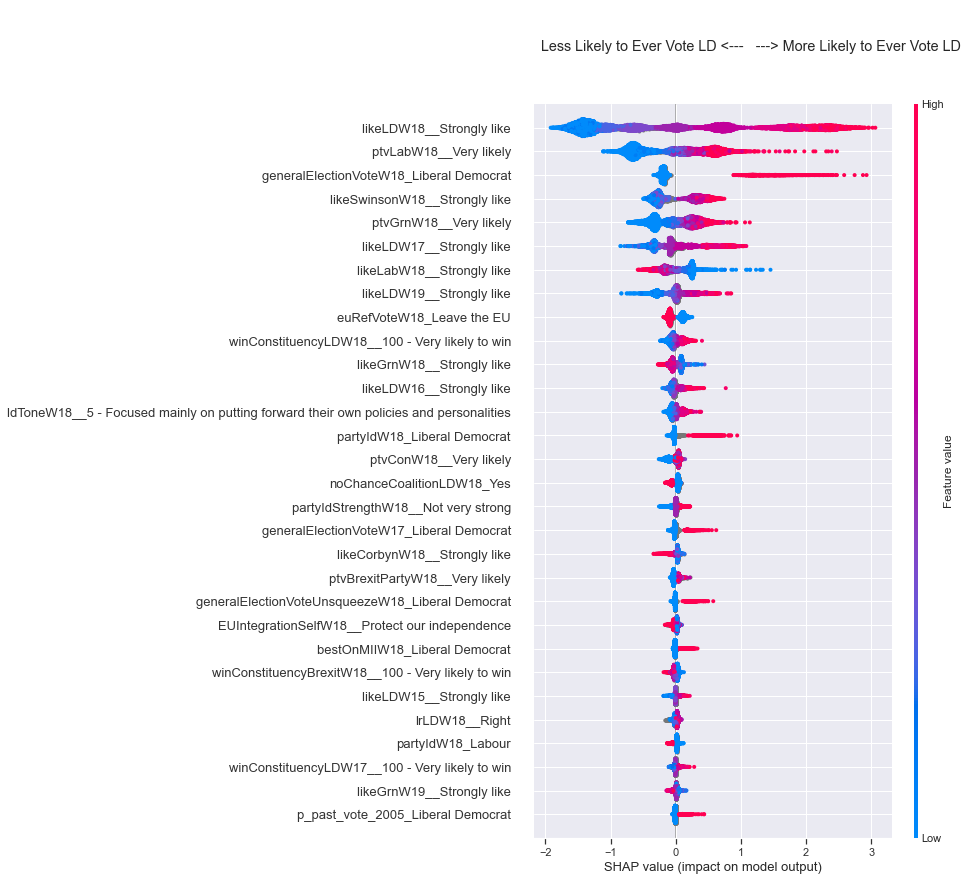

Wall time: 17min 48s


(<shap.explainers.tree.TreeExplainer at 0x60c1b608>,
 array([[ 0.00000000e+00,  0.00000000e+00,  7.09686283e-05, ...,
         -8.42285901e-03, -4.22369078e-04,  9.27361846e-03],
        [ 0.00000000e+00,  0.00000000e+00,  7.09686283e-05, ...,
          6.48703706e-03,  3.19841527e-03,  1.84580311e-02],
        [ 0.00000000e+00,  0.00000000e+00,  7.09686283e-05, ...,
          1.13809435e-02, -6.74620911e-04, -1.71684287e-02],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  7.09686283e-05, ...,
          7.00459816e-04, -1.08061114e-03, -1.30576221e-02],
        [ 0.00000000e+00,  0.00000000e+00,  7.09686283e-05, ...,
          4.82593616e-03,  1.29137151e-02,  4.51627513e-03],
        [ 0.00000000e+00,  0.00000000e+00,  7.09686283e-05, ...,
          1.14607299e-02, -1.69985159e-03, -2.03732103e-02]], dtype=float32),
 Index(['turnoutUKGeneralW1__Very likely that I will vote',
        'turnoutUKGeneralW2__Very likely that I will vote',
        'turnoutUKGeneralW3__Very likely 

In [8]:
%%time
# search(BES_reduced_with_na,"polAttention")
Treatment = "ptvLibDems"
var_stub = "ptvLD"

var_list = ["ptvLDW18__Very likely"]
var_stub_list = [var_stub]

mask = BES_reduced_with_na["ptvLDW18__Very likely"].notnull() & BES_Panel["wt_new_W18"].notnull()
colname = "ptvLDW18"
xgboost_run(subdir=colname,dataset=BES_reduced_with_na[mask],
            var_list=var_list,var_stub_list=var_stub_list,use_specific_weights=BES_Panel["wt_new_W18"][mask],
            min_features = min(BES_reduced_with_na.shape[1]-1,30),
            title = "\n\nLess Likely to Ever Vote LD <---   ---> More Likely to Ever Vote LD")

[10:39:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4.39212
Will train until validation_0-rmse hasn't improved in 31.5 rounds.
[1]	validation_0-rmse:4.24979
[2]	validation_0-rmse:4.11191
[3]	validation_0-rmse:3.98732
[4]	validation_0-rmse:3.87247
[5]	validation_0-rmse:3.76164
[6]	validation_0-rmse:3.65846
[7]	validation_0-rmse:3.56349
[8]	validation_0-rmse:3.47407
[9]	validation_0-rmse:3.38924
[10]	validation_0-rmse:3.31266
[11]	validation_0-rmse:3.23897
[12]	validation_0-rmse:3.16898
[13]	validation_0-rmse:3.10476
[14]	validation_0-rmse:3.04634
[15]	validation_0-rmse:2.98984
[16]	validation_0-rmse:2.94442
[17]	validation_0-rmse:2.90001
[18]	validation_0-rmse:2.85666
[19]	validation_0-rmse:2.81487
[20]	validation_0-rmse:2.77471
[21]	validation_0-rmse:2.73879
[22]	validation_0-rmse:2.70708
[23]	validation_0-rmse:2.67849
[24]	validation_0-rmse:2.64907
[25]	validation_0-rmse:2.62501
[26]	validation_0-rms

[255]	validation_0-rmse:2.20003
[256]	validation_0-rmse:2.19996
[257]	validation_0-rmse:2.19984
[258]	validation_0-rmse:2.19955
[259]	validation_0-rmse:2.19933
[260]	validation_0-rmse:2.19989
[261]	validation_0-rmse:2.19976
[262]	validation_0-rmse:2.20005
[263]	validation_0-rmse:2.20001
[264]	validation_0-rmse:2.19982
[265]	validation_0-rmse:2.1999
[266]	validation_0-rmse:2.19993
[267]	validation_0-rmse:2.19988
[268]	validation_0-rmse:2.19963
[269]	validation_0-rmse:2.19978
[270]	validation_0-rmse:2.19986
[271]	validation_0-rmse:2.20002
[272]	validation_0-rmse:2.20007
[273]	validation_0-rmse:2.2005
[274]	validation_0-rmse:2.20007
[275]	validation_0-rmse:2.20026
[276]	validation_0-rmse:2.20046
[277]	validation_0-rmse:2.20048
Stopping. Best iteration:
[245]	validation_0-rmse:2.19894

MSE: 4.84, MAE: 1.67, EV: 0.60, R2: 0.60
[10:43:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


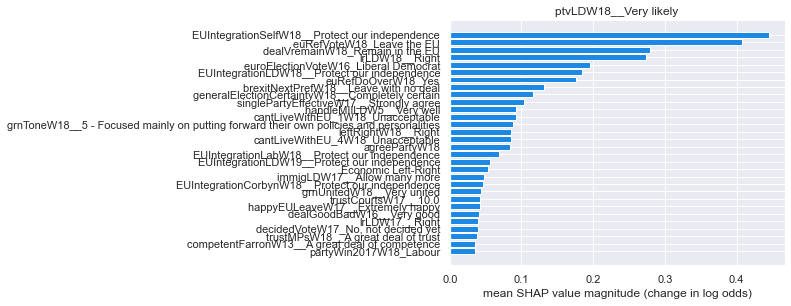

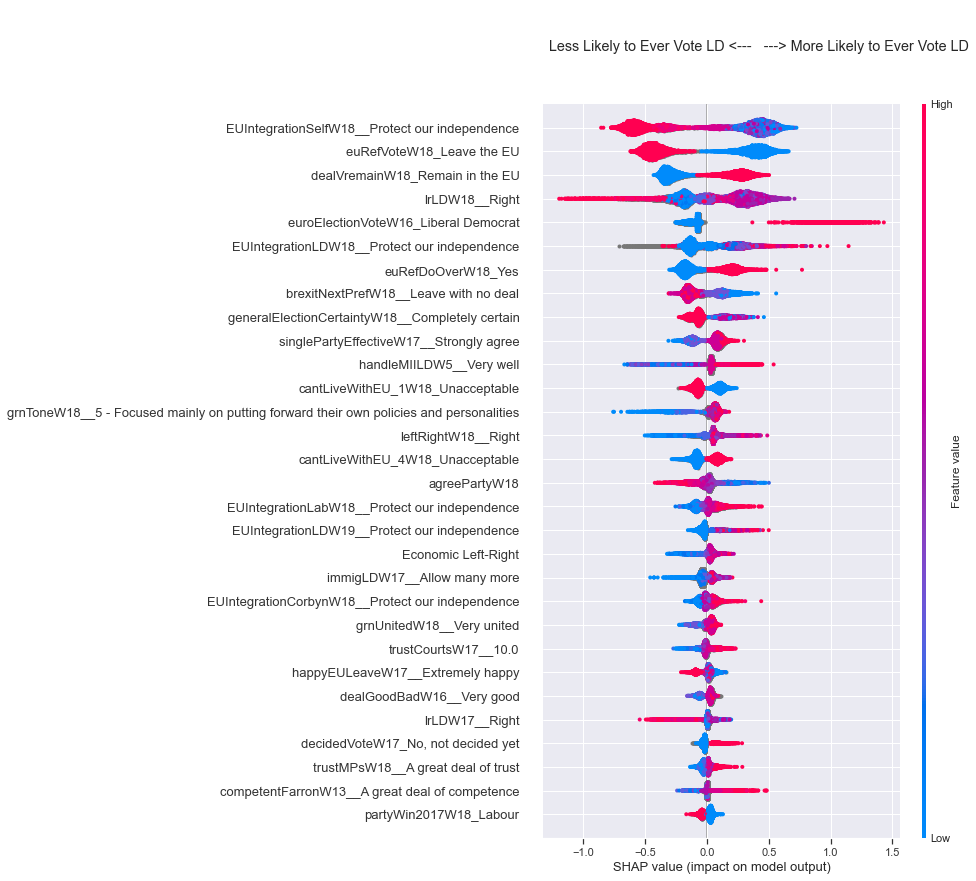

Wall time: 9min 42s


(<shap.explainers.tree.TreeExplainer at 0x612639c8>,
 array([[-0.00852977,  0.01419363, -0.00033447, ..., -0.26852703,
         -0.03878441, -0.00159308],
        [-0.00432336, -0.01490437, -0.01685161, ...,  0.04193634,
          0.01938737,  0.03206126],
        [-0.00073659,  0.00723508,  0.00159091, ...,  0.02383408,
         -0.01194442, -0.00665783],
        ...,
        [-0.00042035,  0.00689164,  0.00138562, ...,  0.02396175,
         -0.0009929 , -0.01296766],
        [-0.0007253 ,  0.01105231,  0.00155483, ...,  0.02340775,
          0.00115754, -0.0017402 ],
        [-0.00067066,  0.00799535,  0.00138562, ...,  0.02984375,
          0.01699873, -0.01093748]], dtype=float32),
 Index(['generalElectionCertaintyW1__Completely certain',
        'generalElectionCertaintyW2__Completely certain',
        'generalElectionCertaintyW3__Completely certain',
        'generalElectionCertaintyW4__Completely certain',
        'generalElectionCertaintyUnsqW5__Completely certain',
        'ge

In [10]:
%%time
# search(BES_reduced_with_na,"polAttention")
Treatment = "ptvLibDems"
var_stub = "ptvLD"

var_list = ["ptvLDW18__Very likely"]
var_stub_list = [var_stub,"ptv","like","generalElectionVote","winConstituency","noChanceCoalitionLD",
                "bestOnMII","p_past_vote","partyId","ld"]

mask = BES_reduced_with_na["ptvLDW18__Very likely"].notnull() & BES_Panel["wt_new_W18"].notnull()
colname = "ptvLDW18"
xgboost_run(subdir=colname,dataset=BES_reduced_with_na[mask],
            var_list=var_list,var_stub_list=var_stub_list,use_specific_weights=BES_Panel["wt_new_W18"][mask],
            min_features = min(BES_reduced_with_na.shape[1]-1,30),
            title = "\n\nLess Likely to Ever Vote LD <---   ---> More Likely to Ever Vote LD")

[11:23:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3.8064
Will train until validation_0-rmse hasn't improved in 24.5 rounds.
[1]	validation_0-rmse:3.67542
[2]	validation_0-rmse:3.55104
[3]	validation_0-rmse:3.43079
[4]	validation_0-rmse:3.32264
[5]	validation_0-rmse:3.22125
[6]	validation_0-rmse:3.12496
[7]	validation_0-rmse:3.03318
[8]	validation_0-rmse:2.94875
[9]	validation_0-rmse:2.87147
[10]	validation_0-rmse:2.79831
[11]	validation_0-rmse:2.72935
[12]	validation_0-rmse:2.6655
[13]	validation_0-rmse:2.60565
[14]	validation_0-rmse:2.55087
[15]	validation_0-rmse:2.49989
[16]	validation_0-rmse:2.45332
[17]	validation_0-rmse:2.40885
[18]	validation_0-rmse:2.36912
[19]	validation_0-rmse:2.33135
[20]	validation_0-rmse:2.29726
[21]	validation_0-rmse:2.264
[22]	validation_0-rmse:2.23476
[23]	validation_0-rmse:2.2069
[24]	validation_0-rmse:2.18133
[25]	validation_0-rmse:2.15768
[26]	validation_0-rmse:2.1

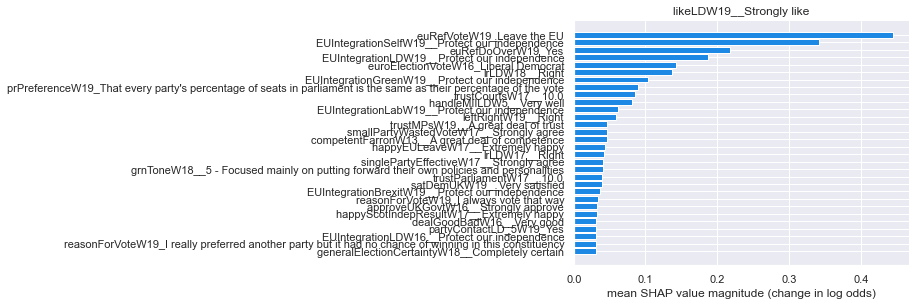

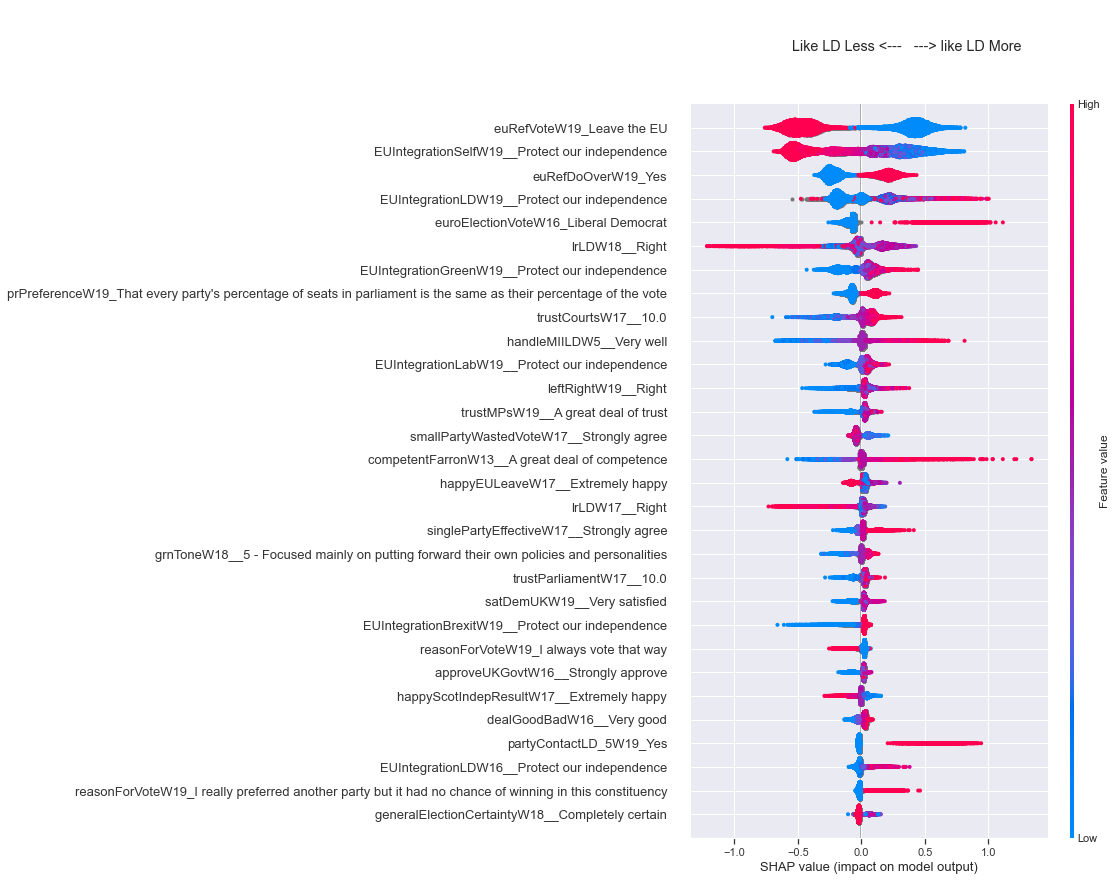

Wall time: 36min 36s


(<shap.explainers.tree.TreeExplainer at 0x63be3208>,
 array([[ 4.64016230e-05,  1.02575126e-04,  0.00000000e+00, ...,
          8.35498516e-03,  2.51552649e-03, -9.17625031e-04],
        [ 4.64016230e-05, -2.36659180e-04,  0.00000000e+00, ...,
         -2.79176701e-02,  3.56049254e-03, -7.11643044e-03],
        [ 4.64016230e-05, -2.55045306e-04,  0.00000000e+00, ...,
         -4.44546938e-02,  1.02741469e-03,  7.41542550e-04],
        ...,
        [-7.14069756e-05,  2.56988918e-04,  0.00000000e+00, ...,
          3.56628262e-02,  2.97166058e-03,  9.23972111e-03],
        [-7.14069756e-05,  1.47254847e-04,  0.00000000e+00, ...,
          3.33388783e-02,  9.30520764e-04,  1.61230043e-02],
        [-7.14069756e-05,  2.13831561e-04,  0.00000000e+00, ...,
         -2.32710484e-02,  2.01902515e-03,  4.84708184e-03]], dtype=float32),
 Index(['generalElectionCertaintyW1__Completely certain',
        'generalElectionCertaintyW2__Completely certain',
        'generalElectionCertaintyW3__Complete

In [13]:
%%time
# search(BES_reduced_with_na,"polAttention")
Treatment = "likeLibDems"
var_stub = "likeLD"

var_list = ["likeLDW19__Strongly like"]
var_stub_list = [var_stub,"ptv","like","generalElectionVote","winConstituency","noChanceCoalitionLD",
                "bestOnMII","p_past_vote","partyId","ld"]

mask = BES_reduced_with_na["likeLDW19__Strongly like"].notnull() & BES_Panel["wt_new_W19_result"].notnull()
colname = "likeLDW19"
xgboost_run(subdir=colname,dataset=BES_reduced_with_na[mask],
            var_list=var_list,var_stub_list=var_stub_list,use_specific_weights=BES_Panel["wt_new_W19_result"][mask],
            min_features = min(BES_reduced_with_na.shape[1]-1,30),
            title = "\n\nLike LD Less <---   ---> like LD More")

In [12]:
search(BES_reduced_with_na,"likeLD")

likeLDW1__Strongly like     14747
likeLDW2__Strongly like     14543
likeLDW3__Strongly like     13284
likeLDW4__Strongly like     14906
likeLDW5__Strongly like     14790
likeLDW6__Strongly like     14467
likeLDW7__Strongly like     28855
likeLDW8__Strongly like     31355
likeLDW9__Strongly like     28022
likeLDW10__Strongly like    27236
likeLDW11__Strongly like    28597
likeLDW12__Strongly like    32033
likeLDW13__Strongly like    29070
likeLDW14__Strongly like    28342
likeLDW15__Strongly like    28038
likeLDW16__Strongly like    34561
likeLDW17__Strongly like    31531
likeLDW18__Strongly like    35357
likeLDW19__Strongly like    30285
dtype: int64